In [45]:
#Gerando um número aleatório de neurônios
n = random.randint(1,5)
print("Nº de neurônios na camada escondida:", n)

Nº de neurônios na camada escondida: 2


In [46]:
# Inicializando uma rede
from random import seed
from random import random
from matplotlib import pyplot as plt 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'Pesos':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'Pesos':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1)
network = initialize_network(2, n, 2)
for layer in network:
	print(layer)

'''Executando o exemplo, você pode ver que o código imprime cada camada uma por uma. Você pode ver que a camada oculta tem n neurônio com 2 pesos de entrada mais o viés. A camada de saída tem 2 neurônios, cada um com 1 peso mais o viés.'''

[{'Pesos': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'Pesos': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
[{'Pesos': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'Pesos': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]


'Executando o exemplo, você pode ver que o código imprime cada camada uma por uma. Você pode ver que a camada oculta tem um neurônio com 2 pesos de entrada mais o viés. A camada de saída tem 2 neurônios, cada um com 1 peso mais o viés.'

In [22]:
from math import exp
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


In [23]:
from matplotlib import pyplot as plt
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


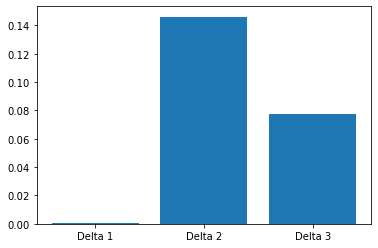

In [24]:
from matplotlib import pyplot as plt
d = [0.0005348048046610517, 0.14619064683582808, 0.0771723774346327]
e = ["Delta 1", "Delta 2", "Delta 3"]
plt.bar(e, d)
plt.show()


In [25]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
import pandas
from urllib.request import urlretrieve
from matplotlib import pyplot as plt

erros = [] 

# Carregando arquivo CSV
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Converte a coluna da string em flot
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Converte a coluna da string em inteiro
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Encontre os valores mínimo e máximo para cada coluna
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Redimensionar colunas do conjunto de dados para o intervalo 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		erros.append(sum_error)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 
# Test training backprop algorithm
'''seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]'''
seed(1)
# load and prepare data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv'
urlretrieve(url, 'seeds_dataset.csv')
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 150, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=68.364
>epoch=1, lrate=0.500, error=80.797
>epoch=2, lrate=0.500, error=80.276
>epoch=3, lrate=0.500, error=78.952
>epoch=4, lrate=0.500, error=76.127
>epoch=5, lrate=0.500, error=71.597
>epoch=6, lrate=0.500, error=66.930
>epoch=7, lrate=0.500, error=63.632
>epoch=8, lrate=0.500, error=61.893
>epoch=9, lrate=0.500, error=61.194
>epoch=10, lrate=0.500, error=61.049
>epoch=11, lrate=0.500, error=61.152
>epoch=12, lrate=0.500, error=61.345
>epoch=13, lrate=0.500, error=61.540
>epoch=14, lrate=0.500, error=61.688
>epoch=15, lrate=0.500, error=61.768
>epoch=16, lrate=0.500, error=61.783
>epoch=17, lrate=0.500, error=61.744
>epoch=18, lrate=0.500, error=61.666
>epoch=19, lrate=0.500, error=61.560
>epoch=20, lrate=0.500, error=61.434
>epoch=21, lrate=0.500, error=61.294
>epoch=22, lrate=0.500, error=61.145
>epoch=23, lrate=0.500, error=60.992
>epoch=24, lrate=0.500, error=60.840
>epoch=25, lrate=0.500, error=60.692
>epoch=26, lrate=0.500, error=60.552
>epoch=27, 

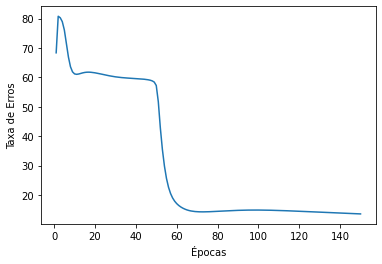

In [26]:
epocas = range(1,151)
plt.plot(epocas, erros)
plt.ylabel('Taxa de Erros')
plt.xlabel('Épocas')
plt.show()

In [27]:
from math import exp
esperados = []
obtidos = []
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	esperados.append(row[-1])
	obtidos.append(prediction)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


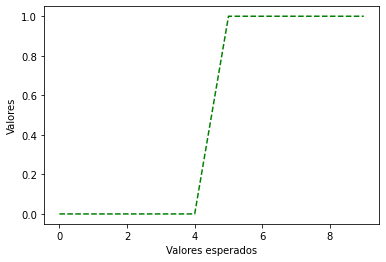

In [28]:
val = range(0,10)
plt.plot(val, esperados,'g--')
plt.ylabel('Valores')
plt.xlabel('Valores esperados')
plt.show()

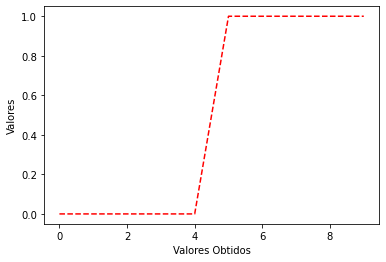

In [29]:
plt.plot(val, obtidos,'r--')
plt.ylabel('Valores')
plt.xlabel('Valores Obtidos')
plt.show()

In [30]:
len(esperados)

10

In [31]:
network

[[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799],
   'output': 0.020376679405025657},
  {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327],
   'output': 0.9694529285797023}],
 [{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829],
   'output': 0.428716603655823},
  {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656],
   'output': 0.8618396836408665}]]